In [76]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# read data as DataFrame using pandas
data = pd.read_csv("chart2000-songmonth-0-3-0054.csv")
columns = data.columns

,month,position,artist,song,score,us,uk,de,fr,ca,au
0,Jan 2000,1,Rob Thomas & Santana,Smooth,3911.953,1,-,44,-,-,5
1,Jan 2000,2,Christina Aguilera,What A Girl Wants,3787.015,1,81,18,-,1,9
2,Jan 2000,3,Savage Garden,I Knew I Loved You,3693.844,1,56,68,43,1,21
3,Jan 2000,4,Celine Dion,That's The Way It Is,3341.488,8,20,9,10,-,14
4,Jan 2000,5,Eiffel 65,Blue (Da Ba Dee),3340.978,6,28,22,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11695,Jun 2019,46,Meduza & Goodboys,Piece Of Your Heart,763.855,-,6,12,86,-,11
11696,Jun 2019,47,Taylor Swift,You Need To Calm Down,748.374,2,5,36,154,4,3
11697,Jun 2019,48,Thomas Rhett,Look What God Gave Her,739.890,37,-,-,-,33,-
11698,Jun 2019,49,Calboy,Envy Me,732.388,38,-,-,-,59,-


Index(['month', 'position', 'artist', 'song', 'score', 'us', 'uk', 'de', 'fr',
       'ca', 'au'],
      dtype='object')


In [77]:
"""
1)
a) How many unique artists are represented in the charts?
b) How many unique songs are represented?
"""
print("Numbers of unique artists in the charts: " + str(len(data["artist"].unique())))
print("Numbers of unique songs in the charts: " + str(len(data["song"].unique())))
print("\n")

Numbers of unique artists in the charts: 1721
Numbers of unique songs in the charts: 2964


In [78]:
"""
2)
a) What song has the highest one-month score of all time?
b) What month was this?
c) Who was the artist?
"""
highest_score_idx = data["score"].idxmax()
print("This song has the highest one-month score of all time: " + data["song"][highest_score_idx])
print("It happens in this month: " + data["month"][highest_score_idx])
artists = data["artist"][highest_score_idx]
# artists = artists.split(",") # First split the artist field by comma
# for element in artists: # Then split the rest of artist field by &, append each splitted artist into
#     if element.split("&") != [element]: # original "artists" list
#         splitted = element.split("&")
#         for artist in splitted:
#             artists.append(artist)
#         artists.remove(element)
print("The artists that produced this song: " + artists)
print("\n")

This song has the highest one-month score of all time: Yeah!
It happens in this month: Apr 2004
The artists that produced this song: Usher, Lil' Jon & Ludacris


In [79]:
"""
3) As I am writing this, I am listening to the song “Safe and Sound” by Capital Cities.
a) How many months was this song on the charts in the United States?
b) What was its peak US chart position?
c) In what month did it achieve this peak US chart position?
"""
charts_of_safe_and_sound = data.loc[(data["song"] == "Safe And Sound")]
print("The song 'Safe and Sound' stayed on the chart for " + str(len(charts_of_safe_and_sound)) + " months.")

highest_pos = charts_of_safe_and_sound["us"].min()
print("Its peak US chart position was: " + str(highest_pos))

highest_score_row = charts_of_safe_and_sound.loc[charts_of_safe_and_sound["us"] == highest_pos]
highest_score_row = highest_score_row.reset_index()
occured_month = highest_score_row["month"][0]
print("The song achieved this peak in " + str(occured_month))
print("\n")

The song 'Safe and Sound' stayed on the chart for 10 months.
Its peak US chart position was: 10
The song achieved this peak in Oct 2013


In [80]:
"""
4)
a) Which artist has spent the most time on the charts as defined by chart-months?
b) How many chart-months have they scored?
"""
artists = data["artist"].unique()
chart_month_total = []
# print(data.loc[data["artist"] == artists[0]])
chart_months_per_artists = []
for artist in artists:
    temp = []
    temp.append(artist)
    temp.append(len(data.loc[data["artist"] == artist]))
    chart_months_per_artists.append(len(data.loc[data["artist"] == artist]))
    chart_month_total.append(temp)

idx_of_max = []
i = 0
while i < len(chart_months_per_artists):
    if chart_months_per_artists[i] == max(chart_months_per_artists):
        idx_of_max.append(i)
    i += 1

artists_of_most_months = []
for idx in idx_of_max:
    current_artist = chart_month_total[idx][0]
    if current_artist not in artists_of_most_months:
        artists_of_most_months.append(current_artist)

print(artists_of_most_months[0] + " has spend the most time on the chart")
print("She has scored " + str(max(chart_months_per_artists)) + " months on the chart")
print("\n")

Rihanna has spend the most time on the chart
She has scored 123 months on the chart


In [81]:
"""
5) How many #1 hits does Drake have in Canada?
"""
drake_data = data.loc[(data["artist"] == "Drake") & (data["ca"] == "1")]
hit_songs = drake_data["song"].unique()
print("Drake has " + str(len(drake_data)) + " #1 hits in Canada.")
print("\n")

Drake has 10 #1 hits in Canada.


In [82]:
"""
6) Which Lady Gaga song on the list did not chart in Australia?
"""
gaga_data = data.loc[(data["artist"] == "Lady GaGa") & (data["au"] == "-")]
# print(gaga_data["song"])
songs = gaga_data["song"].unique()
print("Here are the songs that do not have a position on the chart in Australia: ")
for i, song in enumerate(songs):
    print(str(i + 1) + ": " + song)
print("\n")

Here are the songs that do not have a position on the chart in Australia: 
1: Poker Face
2: LoveGame
3: Paparazzi
4: Alejandro
5: You & I
6: Marry The Night
7: Applause


In [83]:
"""
7)
a) In what month of her career did Ariana Grande have her highest-ever number of songs
on the charts?
b) In this month, how many songs did she chart?
c) What were these songs ranked in the US, and which was the highest?
"""
ariana_grande_data = data.loc[(data["artist"] == "Ariana Grande")]
# print(ariana_grande_data)
months = ariana_grande_data["month"].unique()
# print(months)
AG_months_chart_count = []
for month in months:
    AG_months_chart_count.append(len(ariana_grande_data.loc[ariana_grande_data["month"] == month]))
highest_num_of_songs_idx = AG_months_chart_count.index(max(AG_months_chart_count))
month_of_highest_num_of_songs = months[highest_num_of_songs_idx]
print("In Ariana Grande's career, the highest number of her"
      "\nsongs on the chart is " + str(AG_months_chart_count[highest_num_of_songs_idx])\
      + ", she achieved this in " + str(month_of_highest_num_of_songs) + " .")
print("\n")
print("In corresponding months, here are the songs' ranks: ")
# find rank by month & song
ranks_month = ariana_grande_data.loc[(ariana_grande_data["month"] == month_of_highest_num_of_songs)]
# print(ranks_month)
ranks = ranks_month["us"]
songs = []
for rank in ranks:
    songs.append(ranks_month.loc[ranks_month["us"] == rank])
for i, song in enumerate(songs):
    print(song["song"].values[0] + ", ranked: " + str(song["us"].values[0]))
print("\n")
print("The highest is 7 Rings, ranked 1st on the US chart.")
print("\n")

In Ariana Grande's career, the highest number of her
songs on the chart is 4, she achieved this in Feb 2019 .


In corresponding months, here are the songs' ranks: 
7 Rings, ranked: 1
Thank U, Next, ranked: 3
Break Up With Your Girlfriend, I'm, ranked: 2
Breathin, ranked: 18


The highest is 7 Rings, ranked 1st on the US chart.


These 10 artists had the most unique songs 
make the charts between 2013 and 2017
1. Drake with 19 unique songs
2. Rihanna with 16 unique songs
3. Chris Brown with 14 unique songs
4. Nicki Minaj with 14 unique songs
5. Selena Gomez with 12 unique songs
6. Taylor Swift with 11 unique songs
7. Ed Sheeran with 10 unique songs
8. Ariana Grande with 9 unique songs
9. Jason Derulo with 9 unique songs
10. Kendrick Lamar with 9 unique songs


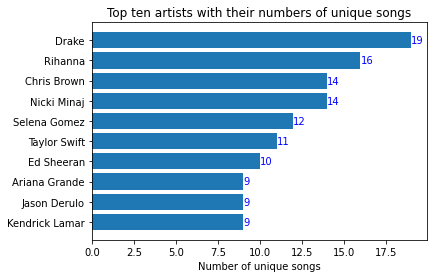

In [89]:
"""
8)
a) Which ten artists had the most unique songs make the charts between 2013 and 2017?
b) Make a bar graph that includes each artist and how many songs they charted. Please
label, title, and color your graph appropriately.
"""
data_q8 = data.drop_duplicates(["song"], keep="first", ignore_index=True)
all_months = data_q8["month"]
data_between_13_17 = []
for i, month in enumerate(all_months):
    year = int(month.split(" ")[1])
    if 2013 <= year <= 2017:
        data_between_13_17.append(data_q8.iloc[i])

artists_in_interval = []

for row in data_between_13_17:
    artists_in_interval.append(row[2])

artists_in_interval = pd.DataFrame(artists_in_interval, columns=["artist"])
artists_in_interval = artists_in_interval["artist"].unique()
artists_in_interval = artists_in_interval.tolist()

artist_counts = []
for artist in artists_in_interval:
    count = 0
    for row in data_between_13_17:
        artists = row[2]
        if artist in artists:
            count += 1
    artist_counts.append(count)
max_10_artists_and_counts = []
orig_length = len(artists_in_interval)
while orig_length - len(artists_in_interval) < 10:
    max_count = max(artist_counts)
    max_index = artist_counts.index(max_count)
    max_artist = artists_in_interval[max_index]
    max_10_artists_and_counts.append([max_artist, max_count])
    artist_counts.pop(max_index)
    artists_in_interval.pop(max_index)

print("These 10 artists had the most unique songs "
      "\nmake the charts between 2013 and 2017")
artists_names = []
artists_count = []
for i, pair in enumerate(max_10_artists_and_counts):
    print(str(i + 1) + ". " + pair[0] + " with " + str(pair[1]) + " unique songs")
    artists_names.append(pair[0])
    artists_count.append(pair[1])

fig, ax = plt.subplots(figsize=(800, 600))
y_pos = np.arange(len(artists_names))
ax.barh(y_pos, artists_count, align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(artists_names)
ax.invert_yaxis()
ax.set_xlabel("Number of unique songs")
ax.set_title("Top ten artists with their numbers of unique songs")
for i, count in enumerate(artists_count):
    ax.text(count, (i + 0.15), str(count), color="blue")
plt.show()


